
# Project: (Investigate a Dataset (TMDb Movie Data))

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose the TMDb movie data set for data analysis. This data set contains information about5000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.

Contain:

Total Rows = 4803
Total Columns = 20
After Seeing the dataset we can say that some columns is contain null values

## Questions
>What kinds of properties are associated with movies that have popularity ?

>Top 20 Production Companies With Higher Number Of Release?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from zipfile import ZipFile 
# specifying the zip file name 
file_name = "138_4508_bundle_archive.zip"
# opening the zip file in read mode 
with ZipFile(file_name, 'r') as X: 
# printing all the contents of the zip file 
    X.printdir() 
# extracting all the files 
    X.extractall()

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


File Name                                             Modified             Size
tmdb_5000_credits.csv                          2019-09-19 18:34:00     40044293
tmdb_5000_movies.csv                           2019-09-19 18:34:04      5698602


<a id='wrangling'></a>
## Data Wrangling

>After Observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevent data and deleting the unused data.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df_movies=pd.read_csv('tmdb_5000_movies.csv')
df_credits=pd.read_csv('tmdb_5000_credits.csv')
# View initial rows
df_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [3]:
df_movies.shape

(4803, 20)

In [4]:
#   types and look for instances of missing or possibly errant data.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
#showing a Sample of dataset
df_movies.sample(n =5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
125,150000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,604,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,The Matrix Reloaded,Six months after the events depicted in The Ma...,70.785910,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2003-05-15,738599701,138.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Free your mind.,The Matrix Reloaded,6.7,3443
1860,25000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,2140,"[{""id"": 90, ""name"": ""paris""}, {""id"": 549, ""nam...",en,Kiss of the Dragon,"Liu Jian, an elite Chinese police officer, com...",16.936576,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2001-07-06,64437847,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Kiss Fear Goodbye,Kiss of the Dragon,6.4,298
3484,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10402, ""...",NaN,13403,"[{""id"": 108, ""name"": ""transvestism""}, {""id"": 2...",en,Hedwig and the Angry Inch,A transexual punk rock girl from East Berlin t...,4.254220,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2001-07-20,0,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An anatomically incorrect rock odyssey,Hedwig and the Angry Inch,7.4,80
3240,5000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",NaN,170,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,28 Days Later,Twenty-eight days after a killer virus was acc...,45.490374,"[{""name"": ""DNA Films"", ""id"": 284}, {""name"": ""B...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2002-10-31,82719885,113.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,His fear began when he woke up alone. His terr...,28 Days Later,7.1,1777
356,90000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://sherlock-holmes-movie.warnerbros.com/,10528,"[{""id"": 703, ""name"": ""detective""}, {""id"": 770,...",en,Sherlock Holmes,"Eccentric consulting detective, Sherlock Holme...",57.834787,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2009-12-23,524028679,128.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing escapes him.,Sherlock Holmes,7.0,5766


In [6]:

df_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
df_movies.fillna(0)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [8]:
df_movies['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [9]:
df_movies.duplicated().sum()

0

In [10]:
df_movies['original_language'].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ar       2
cs       2
id       2
ta       2
ro       2
pl       1
hu       1
nb       1
ky       1
ps       1
el       1
vi       1
te       1
no       1
sl       1
tr       1
is       1
af       1
xx       1
Name: original_language, dtype: int64

In [11]:
df_movies['genres'][1]


'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [12]:
df_movies.isnull().sum()


budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [13]:
print("Rows With Zero Values In The Budget Column:",df_movies[(df_movies['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df_movies[(df_movies['revenue']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df_movies[(df_movies['runtime']==0)].shape[0])


Rows With Zero Values In The Budget Column: 1037
Rows With Zero Values In The Revenue Column: 1427
Rows With Zero Values In The Revenue Column: 35


### Data Cleaning (Removing The Unused Information From The Dataset!)
Information That We Need To Delete Or Modify¶

We need to remove duplicate rows from the dataset
Changing format of release date into datetime format
Remove the unused colums that are not needes in the analysis process.

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#droping unnassry columns 
df_movies.drop(columns=['homepage','id','tagline','overview','spoken_languages','keywords','original_language'],inplace=True)

In [15]:
#convert data type for string to Date Time
df_movies['release_date'] =  pd.to_datetime(df_movies['release_date'])

In [16]:
#showing the shape after cleaning 
df_movies.shape

(4803, 13)

In [17]:
sum(df_movies.duplicated())


0

In [18]:

df_movies.head(3)

,budget,genres,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466


In [19]:
#function for clean string and geting the genres in list 
def get_cat(string):
    categories = []
    for i, word in enumerate(string.split(" ")):
        if word == '"name":':
            value = string.split(" ")[i+1]
#to remove the double quotations and } and ,
            value = value.replace('"','')
            value = value.replace('}','')
            value = value.replace(',','')     
            value = value.replace('{','')           
            value = value.replace('[','')                        
            value = value.replace(']','')                        

            

            categories.append(value)
    return categories


In [20]:
df_movies['genres']=df_movies['genres'].apply(get_cat)

In [21]:
df_movies['genres'].head(1)

0    [Action, Adventure, Fantasy, Science]
Name: genres, dtype: object

In [22]:
#df_movies.drop(columns=['genres'],inplace=True)

In [23]:
df_movies.head(1)

,budget,genres,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science]",Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800


In [24]:
for wn in df_movies['production_companies'][0].split(' '):
    print(wn)

[{"name":
"Ingenious
Film
Partners",
"id":
289},
{"name":
"Twentieth
Century
Fox
Film
Corporation",
"id":
306},
{"name":
"Dune
Entertainment",
"id":
444},
{"name":
"Lightstorm
Entertainment",
"id":
574}]


In [25]:
#function for cleaning string 
def clean_text(text):
    text = text.replace('{',' ')
    text=text.replace(',',' ')
    text=text.replace('"',' ')
    text=text.replace(':',' ')
    text=text.replace('}',' ')
    text=text.replace('[',' ')
    text=text.replace(']',' ')
    return text

In [26]:
#function for gitting alist of company name 
def get_company(text):
    text = clean_text(text).lower()
    x=text.split('    ')
    company_list = []
    for i, word in enumerate(x):
        #print(word)
        if "name" in word:
            company_name = x[i+1]
            company_list.append(company_name)
    return company_list

In [27]:
df_movies['production_companies']=df_movies['production_companies'].apply(get_company)

In [28]:
#for knowing more about companys 
values = []
for company_list in df_movies['production_companies']:
    for company in company_list:
        if company not in values:
            values.append(company)
print(values)

['ingenious film partners', 'twentieth century fox film corporation', 'dune entertainment', 'lightstorm entertainment', 'walt disney pictures', 'jerry bruckheimer films', 'second mate productions', 'columbia pictures', 'danjaq', 'b24', 'legendary pictures', 'warner bros.', 'dc entertainment', 'syncopy', 'laura ziskin productions', 'marvel enterprises', 'walt disney animation studios', 'marvel studios', 'prime focus', 'revolution sun studios', 'heyday films', 'dc comics', 'atlas entertainment', 'cruel & unusual films', 'ratpac-dune entertainment', 'bad hat harry productions', 'eon productions', 'infinitum nihil', 'silver bullet productions (ii)', 'blind wink productions', 'classic media', 'cruel and unusual films', 'walt disney', 'walden media', 'stillking films', 'ozumi films', 'propeler', 'silverbell films', 'paramount pictures', 'moving picture company (mpc)', 'amblin entertainment', 'media magik entertainment', 'imagenation abu dhabi fz', 'hemisphere media capital', 'parkes/macdonal

In [29]:
len(df_movies)

4803

In [30]:
df_movies['production_countries'][0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [31]:
#example1=df_movies['production_countries'][0]

In [32]:
def get_country(text1):
    text1 = clean_text(text1)
    x=text1.split('    ')
    country_name=[]
    for o,world in enumerate(x):
        if 'name'in world:
            country=x[o+1]
            country_name.append(country)
    return country_name

In [33]:
df_movies['production_countries']=df_movies['production_countries'].apply(get_country)

In [34]:
df_movies.head(1)

,budget,genres,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science]",Avatar,150.437577,"[ingenious film partners, twentieth century fo...","[United States of America, United Kingdom ]",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800


In [35]:
df_movies.drop(df_movies[df_movies['budget']==0].index, inplace=True)


In [36]:
df_movies.head()

,budget,genres,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science]",Avatar,150.437577,"[ingenious film partners, twentieth century fo...","[United States of America, United Kingdom ]",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.082615,"[walt disney pictures, jerry bruckheimer films...",[United States of America ],2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",Spectre,107.376788,"[columbia pictures, danjaq, b24]","[United Kingdom, United States of America ]",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,112.312950,"[legendary pictures, warner bros., dc entertai...",[United States of America ],2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science]",John Carter,43.926995,[walt disney pictures],[United States of America ],2012-03-07,284139100,132.0,Released,John Carter,6.1,2124


In [37]:
df_movies.drop(df_movies[df_movies['revenue']==0].index, inplace=True)

In [38]:
df_movies.drop(df_movies[df_movies['runtime']==0].index, inplace=True)

In [39]:
df_movies.shape

(3229, 13)

In [40]:
df_movies['production_countries'].head(5)

0    [United States of America, United Kingdom   ]
1                    [United States of America   ]
2    [United Kingdom, United States of America   ]
3                    [United States of America   ]
4                    [United States of America   ]
Name: production_countries, dtype: object

In [41]:
df_movies['production_companies'][1]

['walt disney pictures', 'jerry bruckheimer films', 'second mate productions']

In [42]:
df_movies.head(10)

,budget,genres,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science]",Avatar,150.437577,"[ingenious film partners, twentieth century fo...","[United States of America, United Kingdom ]",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.082615,"[walt disney pictures, jerry bruckheimer films...",[United States of America ],2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",Spectre,107.376788,"[columbia pictures, danjaq, b24]","[United Kingdom, United States of America ]",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,112.312950,"[legendary pictures, warner bros., dc entertai...",[United States of America ],2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science]",John Carter,43.926995,[walt disney pictures],[United States of America ],2012-03-07,284139100,132.0,Released,John Carter,6.1,2124
5,258000000,"[Fantasy, Action, Adventure]",Spider-Man 3,115.699814,"[columbia pictures, laura ziskin productions, ...",[United States of America ],2007-05-01,890871626,139.0,Released,Spider-Man 3,5.9,3576
6,260000000,"[Animation, Family]",Tangled,48.681969,"[walt disney pictures, walt disney animation s...",[United States of America ],2010-11-24,591794936,100.0,Released,Tangled,7.4,3330
7,280000000,"[Action, Adventure, Science]",Avengers: Age of Ultron,134.279229,"[marvel studios, prime focus, revolution sun s...",[United States of America ],2015-04-22,1405403694,141.0,Released,Avengers: Age of Ultron,7.3,6767
8,250000000,"[Adventure, Fantasy, Family]",Harry Potter and the Half-Blood Prince,98.885637,"[warner bros., heyday films]","[United Kingdom, United States of America ]",2009-07-07,933959197,153.0,Released,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[Action, Adventure, Fantasy]",Batman v Superman: Dawn of Justice,155.790452,"[dc comics, atlas entertainment, warner bros.,...",[United States of America ],2016-03-23,873260194,151.0,Released,Batman v Superman: Dawn of Justice,5.7,7004


<a id='eda'></a>
## Exploratory Data Analysis

>So, now, as the title suggests, we are ready for Exploratory Data Analysis. As we know, we need to form questions for further research and analysis, this part will help us form those questions after we explore deeper and try to look at some specific areas for research. We will do this part stepwise as we have been doing till now.

### Research Question 1 : What kinds of properties are associated with movies that have popularity ?¶
!)

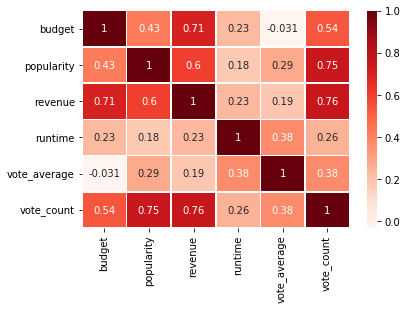

In [43]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# investigate the corr
corr = df_movies.corr()
# plot the correlation
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            annot=True, # Show dimensions in each cell
            cmap="Reds", # Set fill color: yellow, green, blue
            cbar=True,  # Show color bar
            linewidths=0.5, # Add small space between cells for easy data reading
           )
#plt.savefig('Box office correlation matrix.png',dpi=300)


A brief description of the above plots,
##Plot 1: Budget vs Popularity 
>The popularity do increase slightly at higher levels but the number of movies  with high budget  
seem scarce. There is a good possibility that movies with higher investments result in better popularity.
Correlation = 0.43
##Plot 2: Popularity vs Revenue
>The  popularity seems to be increasing with revenue . We can say that if the revenue of movie is high then 
the popularity of the movie may be high.
Correlation = 0.6
##Plot 3: Vote Average vs popularity 
>The correlation between  Popularity and vote average is 0.29. So vote average is not highly related to the Popularity .
##Plot 4: Runtime vs popularity 
>The correlation between Popularity and runtime is 0.18. So runtime is not highly related to the Popularity.


In [44]:
df_movies['production_companies'][0]

['ingenious film partners',
 'twentieth century fox film corporation',
 'dune entertainment',
 'lightstorm entertainment']

### Research Question 2  ( Top 20 Production Companies With Higher Number Of Release?)

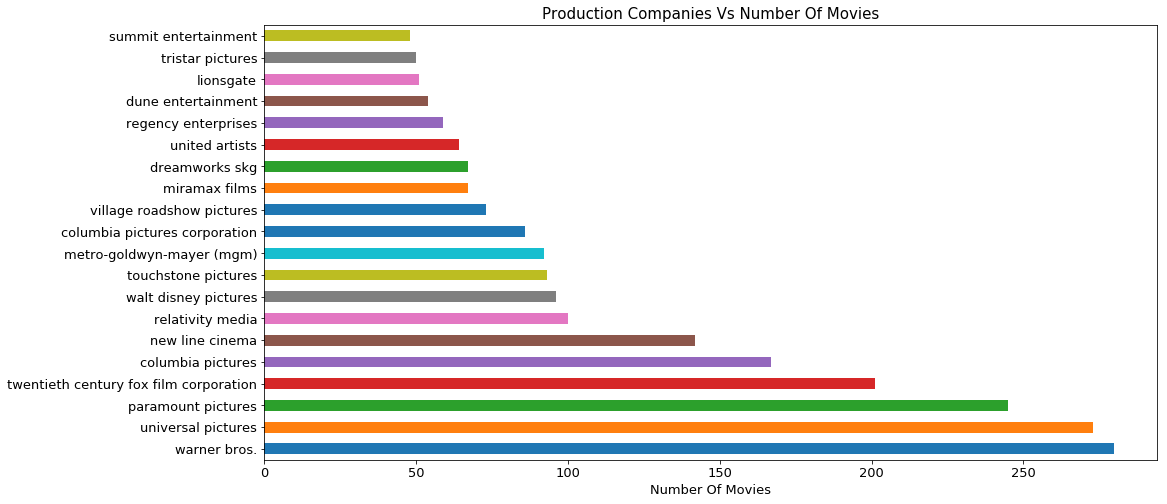

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate
def companys_count(v):
    c=[]
    for x in df_movies[v]:
        for m in x:
            c.append(m) 
            company=pd.Series(c)
    b=company.value_counts(ascending=False)       
    return b
production_companies = companys_count('production_companies')   
production_companies.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
sns.set_style("whitegrid")

<a id='conclusions'></a>
## Conclusions

>Movies with higher popularity  have shown a corresponding increase in the revenues.

> Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.


REsources i use 
geeks for geeks 


##Limitations
>It's not 100 percent guaranteed solution that this formula is gonna work, But it shows us that we have high probability of making high popularity  if we had similar characteristics as such. If we release a movie with these characteristics, it gives people high expectations from this movie. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.



In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0